<a href="https://colab.research.google.com/github/barna-d/AdultML/blob/main/AdultML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving adult.csv to adult.csv


In [ ]:
df = pd.read_csv("adult.csv")
df.head()

,Age,Workclass,fnlgwt,Education,Education Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Country,Above/Below 50k
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
df.info()
df.describe(include='all').T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Age              32561 non-null  int64 
 1   Workclass        32561 non-null  object
 2   fnlgwt           32561 non-null  int64 
 3   Education        32561 non-null  object
 4   Education Num    32561 non-null  int64 
 5   Marital Status   32561 non-null  object
 6   Occupation       32561 non-null  object
 7   Relationship     32561 non-null  object
 8   Race             32561 non-null  object
 9   Sex              32561 non-null  object
 10  Capital Gain     32561 non-null  int64 
 11  Capital Loss     32561 non-null  int64 
 12  Hours/Week       32561 non-null  int64 
 13  Country          32561 non-null  object
 14  Above/Below 50k  32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,32561.0,NaN,NaN,NaN,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
Workclass,32561,9,Private,22696,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlgwt,32561.0,NaN,NaN,NaN,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
Education,32561,16,HS-grad,10501,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education Num,32561.0,NaN,NaN,NaN,10.080679,2.57272,1.0,9.0,10.0,12.0,16.0
Marital Status,32561,7,Married-civ-spouse,14976,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,32561,15,Prof-specialty,4140,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Relationship,32561,6,Husband,13193,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Race,32561,5,White,27816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,32561,2,Male,21790,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df.replace('?', np.nan)
df.isna().sum()

,0
Age,0
Workclass,0
fnlgwt,0
Education,0
Education Num,0
Marital Status,0
Occupation,0
Relationship,0
Race,0
Sex,0


In [ ]:
df['income_flag'] = df['Above/Below 50k'].apply(lambda x: 1 if x.strip() == '>50K' else 0)
df['income_flag'].value_counts()

,count
income_flag,
0,24720
1,7841


In [ ]:
# capital net gain/loss
df['capital_net'] = df['Capital Gain'] - df['Capital Loss']

# bucket working hours
df['hours_bucket'] = pd.cut(df['Hours/Week'],
                            bins=[0,20,35,40,60,100],
                            labels=['part_time','few_hours','full_time','overtime','very_overtime'])

# married flag
df['is_married'] = df['Marital Status'].apply(lambda x: 1 if 'Married' in x else 0)

In [ ]:
df = df.drop(columns=['fnlgwt', 'Above/Below 50k'])
df.head()

,Age,Workclass,Education,Education Num,Marital Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours/Week,Country,income_flag,capital_net,hours_bucket,is_married
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0,2174,full_time,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0,0,part_time,1
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0,0,full_time,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0,0,full_time,1
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0,0,full_time,1


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['income_flag'])
y = df['income_flag']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train.shape, X_test.shape


((26048, 16), (6513, 16))

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

numeric_features = ['Age','Education Num','Capital Gain','Capital Loss','capital_net','Hours/Week']
categorical_features = ['Workclass','Education','Marital Status','Occupation','Relationship','Race','Sex','Country','hours_bucket']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

log_reg = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=2000))
])

log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.8545984953170582
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      4945
           1       0.74      0.61      0.67      1568

    accuracy                           0.85      6513
   macro avg       0.81      0.77      0.79      6513
weighted avg       0.85      0.85      0.85      6513



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=200, random_state=42))
])

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("RF Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


RF Accuracy: 0.8496852448948258
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      4945
           1       0.71      0.64      0.67      1568

    accuracy                           0.85      6513
   macro avg       0.80      0.78      0.79      6513
weighted avg       0.85      0.85      0.85      6513



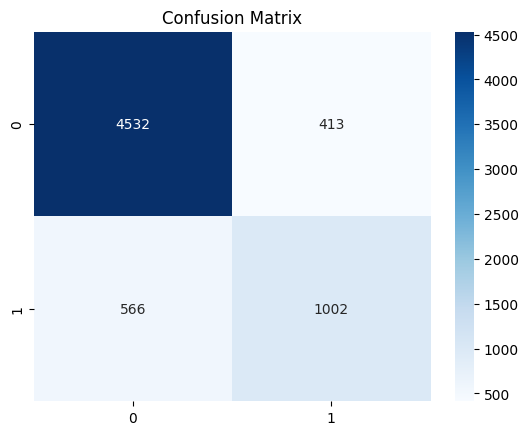

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

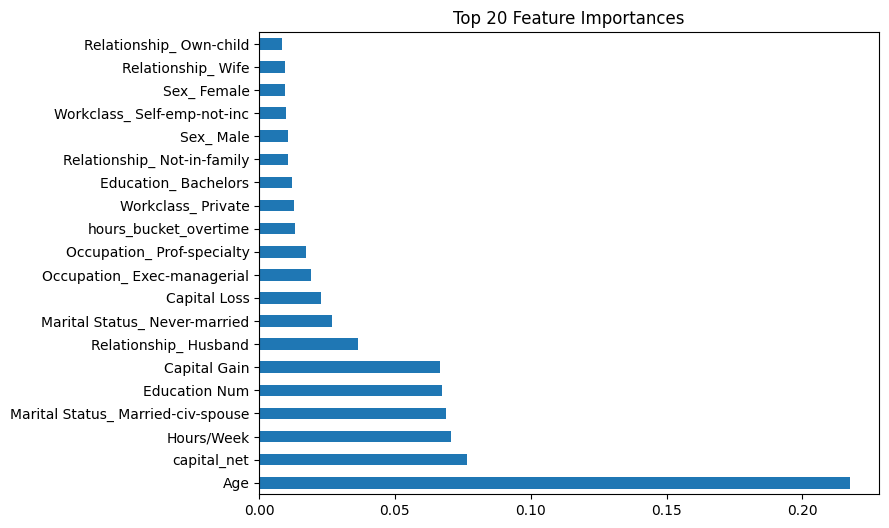

In [ ]:
# extract feature names from encoder
ohe = rf.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']
cat_cols = list(ohe.get_feature_names_out(categorical_features))
all_features = numeric_features + cat_cols

importances = rf.named_steps['classifier'].feature_importances_
feat_imp = pd.Series(importances, index=all_features).sort_values(ascending=False).head(20)

feat_imp.plot(kind='barh', figsize=(8,6))
plt.title("Top 20 Feature Importances")
plt.show()

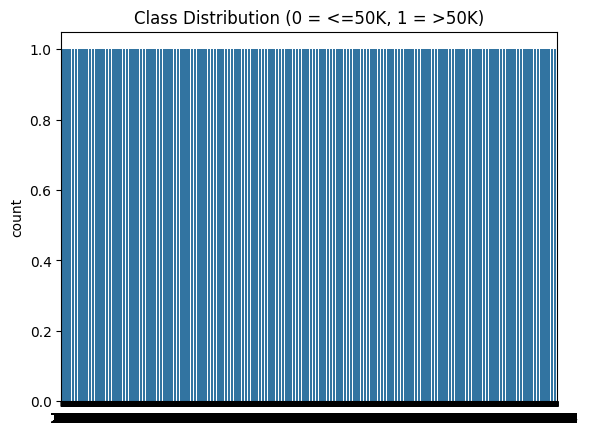

,proportion
income_flag,
0,0.75919
1,0.24081


In [ ]:
# CLASS IMBALANCE CHECK
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(df['income_flag'])
plt.title("Class Distribution (0 = <=50K, 1 = >50K)")
plt.show()

df['income_flag'].value_counts(normalize=True)

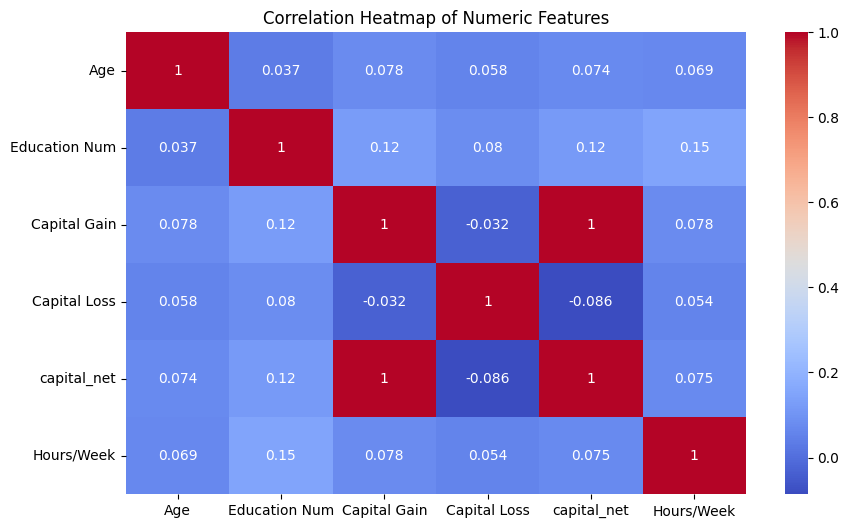

In [ ]:
# CORRELATION HEATMAP FOR NUMERIC FEATURES
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_features].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

In [ ]:
# APPLY SMOTE TO BALANCE CLASSES
from imblearn.over_sampling import SMOTE

# Apply preprocessing to X_train before SMOTE
# The preprocessor is already defined in a previous cell (RkgbaAfUgJb1)
X_train_processed = preprocessor.fit_transform(X_train)

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_processed, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())

Before SMOTE: income_flag
0    19775
1     6273
Name: count, dtype: int64
After SMOTE: income_flag
1    19775
0    19775
Name: count, dtype: int64


In [ ]:
# MODEL PERFORMANCE SUMMARY TABLE

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predictions from your best model (using Random Forest as an example)
y_pred = rf.predict(X_test)

# Create summary table
performance_table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Score': [
        accuracy_score(y_test, y_pred),
        precision_score(y_test, y_pred),
        recall_score(y_test, y_pred),
        f1_score(y_test, y_pred)
    ]
})

performance_table

,Metric,Score
0,Accuracy,0.849685
1,Precision,0.708127
2,Recall,0.639031
3,F1 Score,0.671807


In [ ]:
# MUTUAL INFORMATION SCORE
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Create a copy of X_train to avoid modifying the original DataFrame
X_train_encoded = X_train.copy()

# Identify categorical columns (object type and categorical type)
categorical_cols_for_mi = X_train_encoded.select_dtypes(include=['object', 'category']).columns

# Apply LabelEncoder to each categorical column
for col in categorical_cols_for_mi:
    le = LabelEncoder()
    X_train_encoded[col] = le.fit_transform(X_train_encoded[col])

# Now all relevant categorical columns are numerically encoded.
# 'discrete_features='auto' should now correctly identify integer columns as discrete.
mi_scores = mutual_info_classif(X_train_encoded, y_train, discrete_features='auto')
mi_series = pd.Series(mi_scores, index=X_train_encoded.columns).sort_values(ascending=False)

mi_series.head(15)

,0
capital_net,0.118207
Relationship,0.116038
Marital Status,0.109668
is_married,0.101882
Capital Gain,0.085774
Age,0.068779
Education Num,0.066356
Education,0.064814
Occupation,0.064441
Hours/Week,0.041206


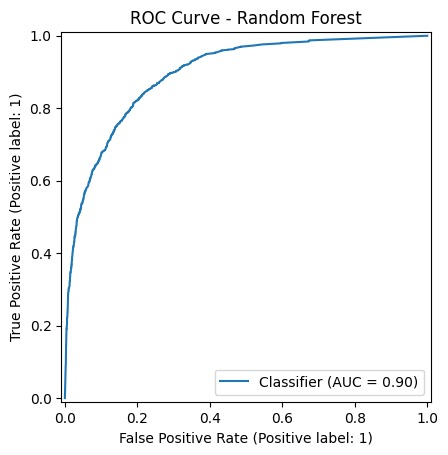

In [ ]:
# --- ROC CURVE FOR YOUR NON-PIPELINE RANDOM FOREST MODEL (rf) ---

from sklearn.metrics import RocCurveDisplay

# The pipeline 'rf' includes the preprocessor, so we pass the raw X_test directly.
# 1. Get predicted probabilities for the positive class (income=1)
y_proba = rf.predict_proba(X_test)[:, 1]

# 2. Plot ROC curve
RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title("ROC Curve - Random Forest")
plt.show()

In [ ]:
# SIMPLE HYPERPARAMETER TUNING (RANDOM FOREST)

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Parameter grid (beginner-friendly, not too big)
param_dist = {
    'classifier__n_estimators': [100, 150, 200],
    'classifier__max_depth': [None, 5, 10, 15],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__bootstrap': [True, False]
}

rf_tune = RandomizedSearchCV(
    estimator=rf,          # your existing RF model
    param_distributions=param_dist,
    n_iter=8,              # small number → fast
    scoring='accuracy',
    cv=3,
    random_state=42,
    n_jobs=-1
)

# Pass the original X_train directly to fit, as the pipeline will handle preprocessing
rf_tune.fit(X_train, y_train)

# Best tuned model
best_tuned_rf = rf_tune.best_estimator_
print("Best Parameters:", rf_tune.best_params_)

Best Parameters: {'classifier__n_estimators': 150, 'classifier__min_samples_split': 2, 'classifier__max_depth': 15, 'classifier__bootstrap': True}


In [ ]:
# SAVE THE FINAL MODEL
import joblib

joblib.dump(best_tuned_rf, "final_income_model.joblib")
print("Model saved as final_income_model.joblib")


Model saved as final_income_model.joblib


In [ ]:
# CLEAN PREDICTION OUTPUT TABLE

import pandas as pd

# Get predictions from final pipeline
final_preds = best_tuned_rf.predict(X_test)

# Convert 0/1 into readable labels
label_map = {0: "<=50K", 1: ">50K"}
final_labels = [label_map[p] for p in final_preds]

# Create a clean table showing 10 predictions
clean_output = pd.DataFrame({
    "Actual Income": [label_map[y] for y in y_test[:10]],
    "Predicted Income": final_labels[:10]
})

clean_output

,Actual Income,Predicted Income
0,<=50K,<=50K
1,<=50K,<=50K
2,>50K,>50K
3,>50K,>50K
4,<=50K,<=50K
5,<=50K,<=50K
6,<=50K,<=50K
7,<=50K,<=50K
8,<=50K,<=50K
9,<=50K,<=50K
